# Covid-19 prediction for india by three method
svm,polynomial reg,and prophet

   <font face = "Verdana" size ="1">
    <center><img src='https://cdn.mos.cms.futurecdn.net/WxgePFJHTNAQRBuP3g5hoM-650-80.jpg.webp'>

In [101]:
import numpy as np
from pandas import DataFrame
# importing the required libraries
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

##  [ 1.0 ] by using same Johns Hopkins University dataset

In [182]:
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
in_confirmed_cases = confirmed_cases.loc[confirmed_cases['Country/Region'] == 'India']
in_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
146,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,11124527,11139516,11156923,11173761,11192045,11210799,11229398,11244786,11262707,11285561,11308846,11333728,11359048,11385339,11409831,11438734,11474605,11514331,11555284,11599130,11646081,11686796,11734058,11787534,11846652,11908910,11971624,12039644,12095855,12149335,12221665,12303131,12392260,12485509,12589067,12686049,12801785,12928574,13060542,13060542


In [104]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
in_deaths_reported = deaths_reported.loc[confirmed_cases['Country/Region'] == 'India']
in_deaths_reported

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
146,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,157248,157346,157435,157548,157656,157756,157853,157930,158063,158189,158306,158446,158607,158725,158856,159044,159216,159370,159558,159755,159967,160166,160441,160692,160949,161240,161552,161843,162114,162468,162927,163396,164110,164623,165101,165547,166177,166862,167642,167642


In [105]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
in_recovered_cases = recovered_cases.loc[recovered_cases['Country/Region'] == 'India']
in_recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
131,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,...,10798921,10812044,10826075,10839894,10854126,10868520,10882798,10899394,10920046,10938146,10953303,10973260,10989897,11007352,11027543,11045284,11063025,11083679,11107332,11130288,11151468,11181253,11205160,11231650,11264637,11295023,11323762,11355993,11393021,11434301,11474683,11525039,11569241,11629289,11682136,11732279,11792135,11851393,11913292,11913292


## [ 2.0 ] stat wise daily cases in india

In [106]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-08-2021.csv')
in_latest_data = latest_data.loc[latest_data['Country_Region'] == 'India']
in_latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
249,NaN,NaN,Andaman and Nicobar Islands,India,2021-04-09 04:21:13,11.225999,92.968178,5149,62,5027.0,60.0,"Andaman and Nicobar Islands, India",1234.665592,1.204117
250,NaN,NaN,Andhra Pradesh,India,2021-04-09 04:21:13,15.912900,79.740000,915832,7268,893651.0,14913.0,"Andhra Pradesh, India",1699.024772,0.793595
251,NaN,NaN,Arunachal Pradesh,India,2021-04-09 04:21:13,27.768456,96.384277,16873,56,16788.0,29.0,"Arunachal Pradesh, India",1074.399952,0.331891
252,NaN,NaN,Assam,India,2021-04-09 04:21:13,26.357149,92.830441,219272,1112,215790.0,2370.0,"Assam, India",615.810823,0.507133
253,NaN,NaN,Bihar,India,2021-04-09 04:21:13,25.679658,85.604840,273830,1595,264730.0,7505.0,"Bihar, India",219.415194,0.582478


In [107]:
in_data = in_latest_data.drop(index= [282]) # we have null values in that row

In [108]:
in_data2 = in_data.drop(columns= ['FIPS', 'Admin2','Country_Region','Lat', 'Long_','Combined_Key',])

In [109]:
in_data2.style.background_gradient(cmap='Reds')

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
249,Andaman and Nicobar Islands,2021-04-09 04:21:13,5149,62,5027.000000,60.000000,1234.665592,1.204117
250,Andhra Pradesh,2021-04-09 04:21:13,915832,7268,893651.000000,14913.000000,1699.024772,0.793595
251,Arunachal Pradesh,2021-04-09 04:21:13,16873,56,16788.000000,29.000000,1074.399952,0.331891
252,Assam,2021-04-09 04:21:13,219272,1112,215790.000000,2370.000000,615.810823,0.507133
253,Bihar,2021-04-09 04:21:13,273830,1595,264730.000000,7505.000000,219.415194,0.582478
254,Chandigarh,2021-04-09 04:21:13,29521,389,26017.000000,3115.000000,2548.268281,1.317706
255,Chhattisgarh,2021-04-09 04:21:13,407231,4563,334543.000000,68125.000000,1383.434584,1.120494
256,Dadra and Nagar Haveli and Daman and Diu,2021-04-09 04:21:13,3842,2,3631.000000,209.000000,623.980875,0.052056
257,Delhi,2021-04-09 04:21:13,698005,11157,663667.000000,23181.000000,3730.468226,1.598413
258,Goa,2021-04-09 04:21:13,60811,842,56638.000000,3331.000000,3833.632782,1.384618


In [110]:
map = folium.Map(location=[20, 60], zoom_start=4,tiles='Stamenterrain')
for lat, lon, value, name in zip(in_data['Lat'], in_data['Long_'], in_data['Confirmed'], in_data['Province_State']):
    folium.CircleMarker([lat, lon], radius=value*(1/40000), popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<strong>Confirmed</strong>: ' + str(value) + ' '),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## [ 3.0 ] Data pre-processing for prediction

In [111]:
c_df23 = in_confirmed_cases.drop(columns= ['Province/State','Country/Region','Lat','Long'])
d_df23 = in_deaths_reported.drop(columns= ['Province/State','Country/Region','Lat','Long'])
r_df23 = in_recovered_cases.drop(columns= ['Province/State','Country/Region','Lat','Long'])


In [112]:
dfconfirmed_cases = c_df23.transpose()
dfdeaths_reported = d_df23.transpose()
dfrecovered_cases = r_df23.transpose()

In [113]:
dfconfirmed_cases.index.name = 'Date_YMD'
dfconfirmed_cases.reset_index(inplace=True)
dfdeaths_reported.index.name = 'Date_YMD'
dfdeaths_reported.reset_index(inplace=True)
dfrecovered_cases.index.name = 'Date_YMD'
dfrecovered_cases.reset_index(inplace=True)


In [114]:
c_df11 = dfconfirmed_cases.rename(columns={ 146 : "TotalConfirmed"})
d_df11 = dfdeaths_reported.rename(columns={ 146 : "TotalDeath"})
r_df11 = dfrecovered_cases.rename(columns={ 131 : "TotalRecovered"})

In [115]:
df_confirmed = c_df11
df_deaths = d_df11
df_recovered = r_df11

In [116]:
pip install pycountry

In [117]:
pip install geopandas

In [118]:
import pycountry
import plotly.express as px
import pandas as pd
# Starting the required libraries
import numpy as np
import geopandas as gpd
import pandas as pd
from functools import reduce

In [119]:
id_list = in_confirmed_cases.columns.to_list()[:4]
vars_list = in_confirmed_cases.columns.to_list()[4:]
confirmed_tidy = pd.melt(in_confirmed_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Confirmed')
deaths_tidy = pd.melt(in_deaths_reported, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Deaths')
recovered_tidy = pd.melt(in_recovered_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='recovered')
# 1.3 Merging the three dataframes into one
data_frames = [confirmed_tidy, deaths_tidy, recovered_tidy]          
df_corona = reduce(lambda left, right: pd.merge(left, right, on = id_list+['Date'], how='outer'), data_frames)

id_vars = df_corona.columns[:5]
data_type = ['Confirmed', 'Deaths', 'recovered']
df_corona = pd.melt(df_corona, id_vars=id_vars,value_vars=data_type, var_name='type', value_name='Count')
df_corona['Date'] = pd.to_datetime(df_corona['Date'],format='%m/%d/%y', errors='raise')

In [120]:
corona_sums = df_corona.groupby(['type', 'Date'],as_index=False).agg({'Count':'sum'})


In [121]:
pip install plotly_express

In [122]:
import plotly_express as px
def plot_timeseries(df):
    fig = px.line(df, x='Date', y='Count', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)

fig = plot_timeseries(corona_sums)
fig.show()

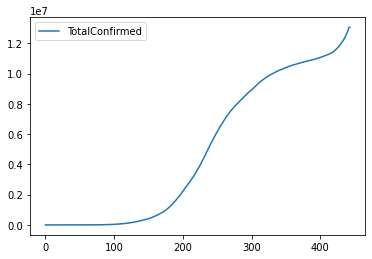

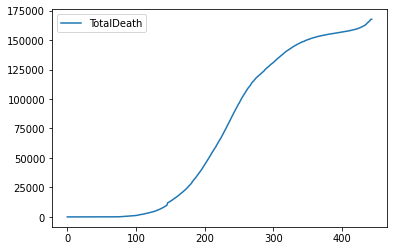

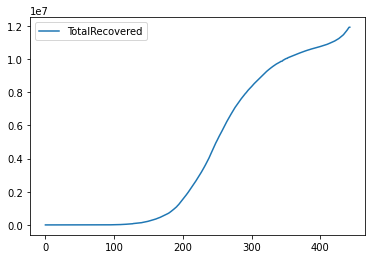

In [123]:
df_confirmed.plot()
df_deaths.plot()
df_recovered.plot()

In [124]:
df_c = df_confirmed
df_c.columns = ['ds', 'y']

In [125]:
df_d = df_deaths
df_d.columns = ['ds', 'y']


In [126]:
df_r = df_recovered
df_r.columns = ['ds', 'y']


In [127]:
df_c['ds'] = pd.to_datetime(df_c['ds'])


In [128]:
df_d['ds'] = pd.to_datetime(df_d['ds'])


In [129]:
df_r['ds'] = pd.to_datetime(df_r['ds'])

## [ 4.0 ] method1: by using prophet model

In [130]:
from fbprophet import Prophet

In [131]:
# Initialize the Model
c_model = Prophet(daily_seasonality=True)
c_model.fit(df_c)
d_model = Prophet(daily_seasonality=True)
d_model.fit(df_d)
r_model = Prophet(daily_seasonality=True)
r_model.fit(df_r)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [132]:
# Create future dates of 30 days
future_dates = c_model.make_future_dataframe(periods = 100)
future_dates.tail()

,ds
539,2021-07-14
540,2021-07-15
541,2021-07-16
542,2021-07-17
543,2021-07-18


In [133]:
c_prediction = c_model.predict(future_dates)
d_prediction = d_model.predict(future_dates)
r_prediction = r_model.predict(future_dates)


In [134]:
corona_sums

,type,Date,Count
0,Confirmed,2020-01-22,0
1,Confirmed,2020-01-23,0
2,Confirmed,2020-01-24,0
3,Confirmed,2020-01-25,0
4,Confirmed,2020-01-26,0
...,...,...,...
1327,recovered,2021-04-05,11732279
1328,recovered,2021-04-06,11792135
1329,recovered,2021-04-07,11851393
1330,recovered,2021-04-08,11913292


In [135]:
id_list = in_confirmed_cases.columns.to_list()[:4]
vars_list = in_confirmed_cases.columns.to_list()[4:]
confirmed_tidy = pd.melt(in_confirmed_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Confirmed')
deaths_tidy = pd.melt(in_deaths_reported, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Deaths')
recovered_tidy = pd.melt(in_recovered_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='recovered')
# 1.3 Merging the three dataframes into one
data_frames = [confirmed_tidy, deaths_tidy, recovered_tidy]          
df_corona = reduce(lambda left, right: pd.merge(left, right, on = id_list+['Date'], how='outer'), data_frames)

id_vars = df_corona.columns[:5]
data_type = ['Confirmed', 'Deaths', 'recovered']
df_corona = pd.melt(df_corona, id_vars=id_vars,value_vars=data_type, var_name='type', value_name='Count')
df_corona['Date'] = pd.to_datetime(df_corona['Date'],format='%m/%d/%y', errors='raise')

In [136]:
aq = np.round(c_prediction)
aq1 = np.round(d_prediction)
aq2 = np.round(r_prediction)

In [137]:
v1 = aq[aq.columns[0:2]]
v1['type'] = 'Confirmed'
v2 = aq1[aq.columns[0:2]]
v2['type'] = 'Deaths'
v3 = aq2[aq.columns[0:2]]
v3['type'] = 'recovered'
data_frames = [v1,v2,v3]
df = pd.concat([v1, v2, v3], axis=0)
df.reset_index(drop=True, inplace=True)
df

,ds,trend,type
0,2020-01-22,-1546.0,Confirmed
1,2020-01-23,-1327.0,Confirmed
2,2020-01-24,-1109.0,Confirmed
3,2020-01-25,-890.0,Confirmed
4,2020-01-26,-672.0,Confirmed
...,...,...,...
1627,2021-07-14,13216311.0,recovered
1628,2021-07-15,13233455.0,recovered
1629,2021-07-16,13250599.0,recovered
1630,2021-07-17,13267743.0,recovered


In [138]:
corona_sums1 = df.groupby(['type', 'ds'],as_index=False).agg({'trend':'sum'})
def plot_timeseries1(df):
    fig = px.line(df, x='ds', y='trend', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)
    
fig = plot_timeseries1(corona_sums1)
fig.show()

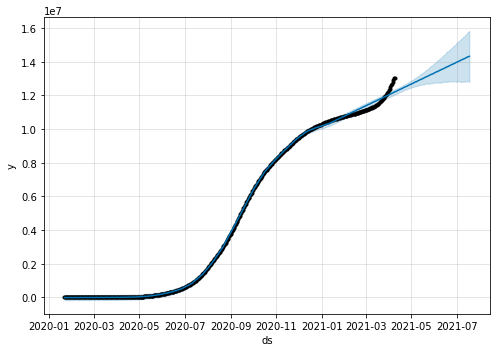

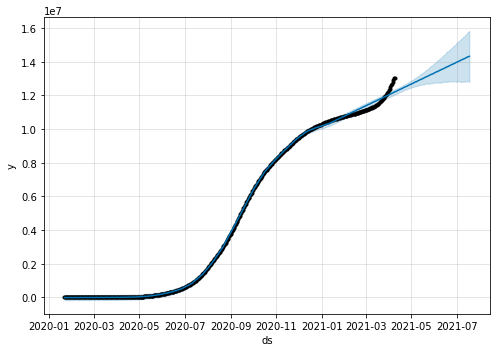

In [139]:
c_model.plot(c_prediction,figsize=(7,5))


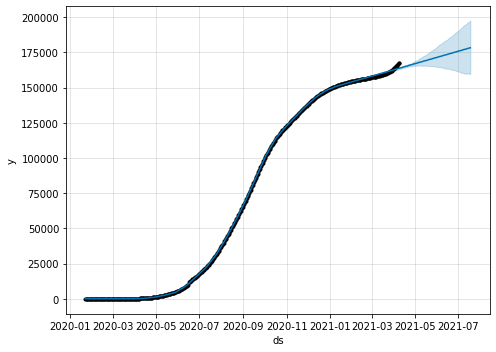

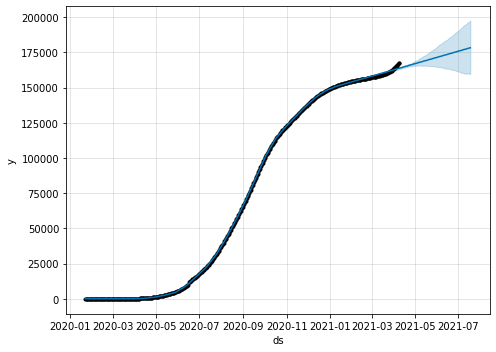

In [140]:
d_model.plot(d_prediction,figsize=(7,5))

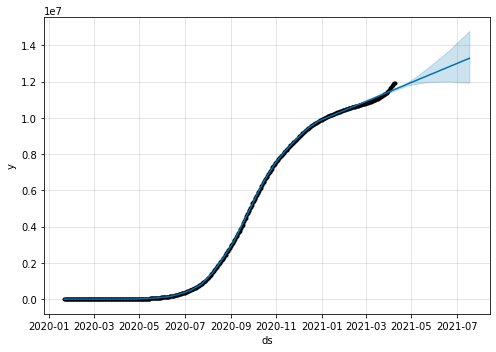

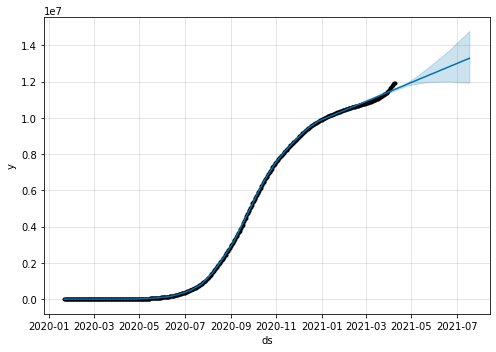

In [141]:
r_model.plot(r_prediction,figsize=(7,5))

### [ 4.1 ] Confirmed cases prediction

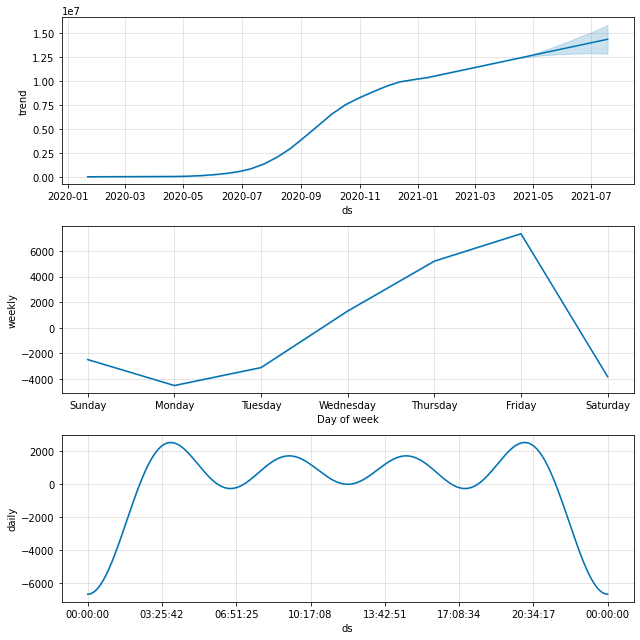

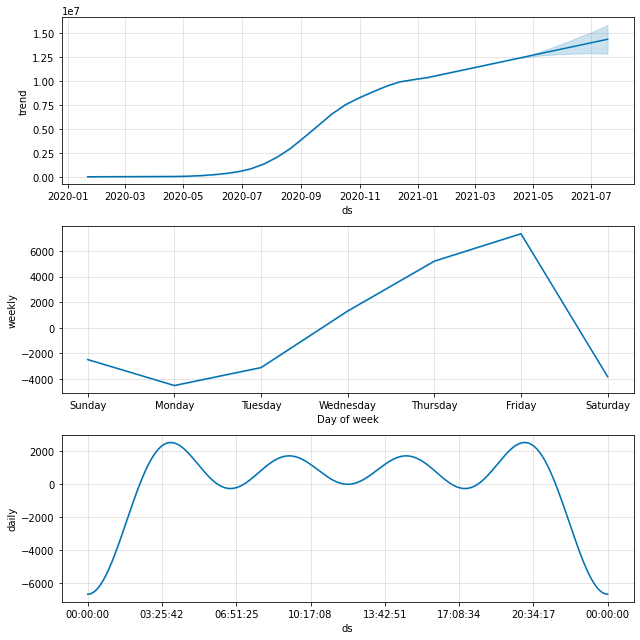

In [142]:
# Visualize each components [Trends, Weekly]
c_model.plot_components(c_prediction)

### [ 4.2 ] Death cases prediction

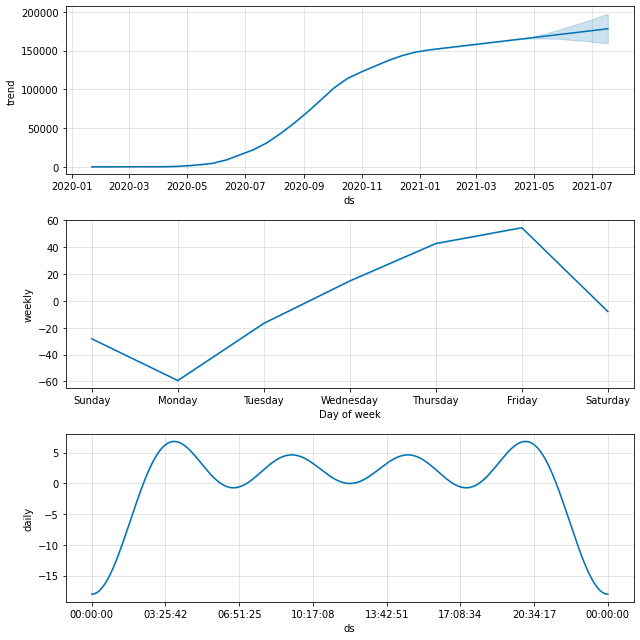

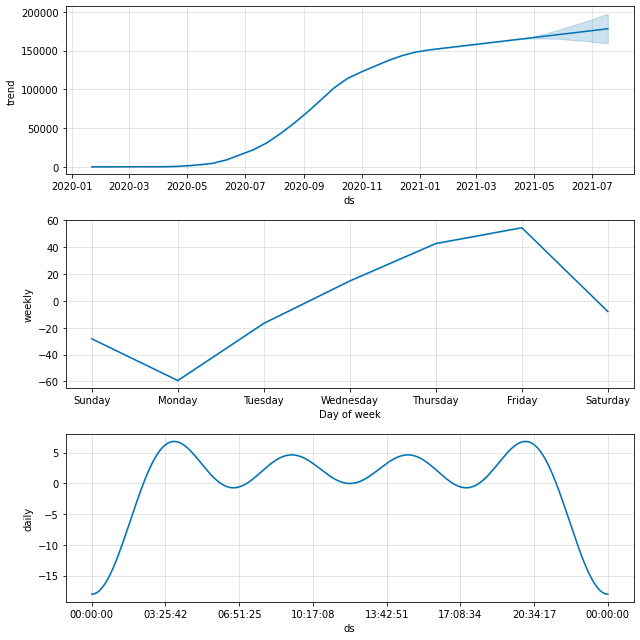

In [143]:
# Visualize each components [Trends, Weekly]
d_model.plot_components(d_prediction)

### [ 4.3 ] Recovered cases prediction

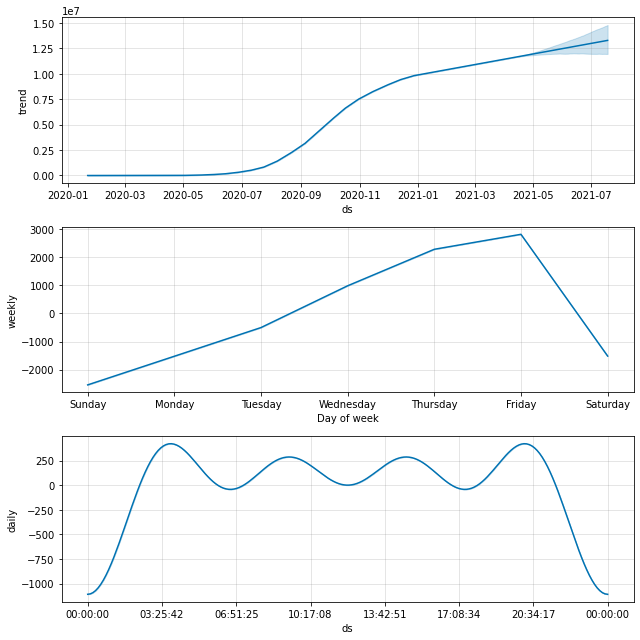

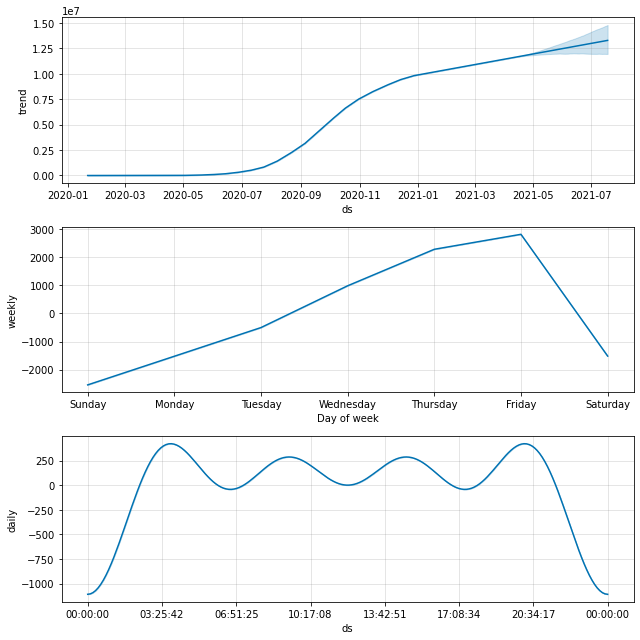

In [144]:
# Visualize each components [Trends, Weekly]
r_model.plot_components(r_prediction)

### [ 4.4 ] Prophet Model Evaluation

In [145]:
from fbprophet.diagnostics import cross_validation
df_cv_c = cross_validation(c_model, period='1 days', horizon = '100 days')
df_cv_d = cross_validation(d_model, period='1 days', horizon = '100 days')
df_cv_r = cross_validation(r_model, period='1 days', horizon = '100 days')

INFO:fbprophet:Making 44 forecasts with cutoffs between 2020-11-17 00:00:00 and 2020-12-30 00:00:00


INFO:fbprophet:Making 44 forecasts with cutoffs between 2020-11-17 00:00:00 and 2020-12-30 00:00:00


INFO:fbprophet:Making 44 forecasts with cutoffs between 2020-11-17 00:00:00 and 2020-12-30 00:00:00


In [146]:
from fbprophet.diagnostics import performance_metrics
df_p_c = performance_metrics(df_cv_c)
df_p_d = performance_metrics(df_cv_d)
df_p_r = performance_metrics(df_cv_r)

In [147]:
print(df_p_c.head())
print(df_p_r.head())
print(df_p_d.head())

  horizon           mse           rmse  ...      mape     mdape  coverage
0 10 days  9.729406e+10  311919.965140  ...  0.030986  0.030827       0.0
1 11 days  1.102300e+11  332009.072424  ...  0.032944  0.032957       0.0
2 12 days  1.243359e+11  352612.924672  ...  0.034946  0.035038       0.0
3 13 days  1.396839e+11  373743.072904  ...  0.036995  0.037110       0.0
4 14 days  1.563237e+11  395377.914992  ...  0.039088  0.039159       0.0

[5 rows x 7 columns]
  horizon           mse           rmse  ...      mape     mdape  coverage
0 10 days  1.567647e+11  395935.205483  ...  0.041601  0.041069       0.0
1 11 days  1.762078e+11  419771.173106  ...  0.044007  0.043406       0.0
2 12 days  1.971314e+11  443994.780906  ...  0.046442  0.046057       0.0
3 13 days  2.196353e+11  468652.627901  ...  0.048912  0.048365       0.0
4 14 days  2.437815e+11  493742.318882  ...  0.051415  0.050828       0.0

[5 rows x 7 columns]
  horizon           mse         rmse          mae      mape     mdap

In [148]:
print("Confirmed Cases")
print(df_p_c.mean())
print("Recovered Cases")
print(df_p_r.mean())
print("Deaths")
print(df_p_d.mean())


Confirmed Cases
horizon     55 days 00:00:00
mse              3.48149e+12
rmse             1.65886e+06
mae                 1.64e+06
mape                0.151001
mdape               0.150184
coverage           0.0003996
dtype: object
Recovered Cases
horizon     55 days 00:00:00
mse              5.06085e+12
rmse             1.99458e+06
mae              1.97629e+06
mape                0.188003
mdape               0.186932
coverage                   0
dtype: object
Deaths
horizon     55 days 00:00:00
mse              5.62116e+08
rmse                 20725.9
mae                  20547.1
mape                0.132652
mdape               0.129045
coverage                   0
dtype: object


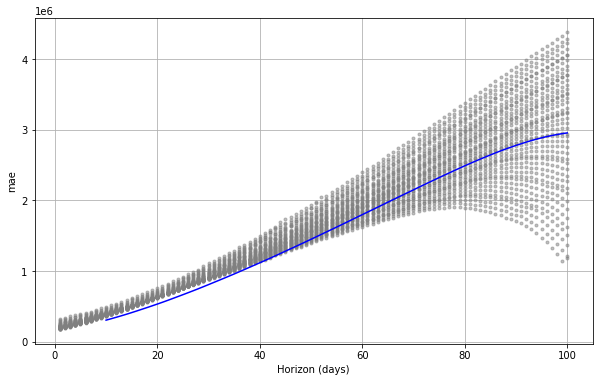

In [149]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_c, metric='mae')

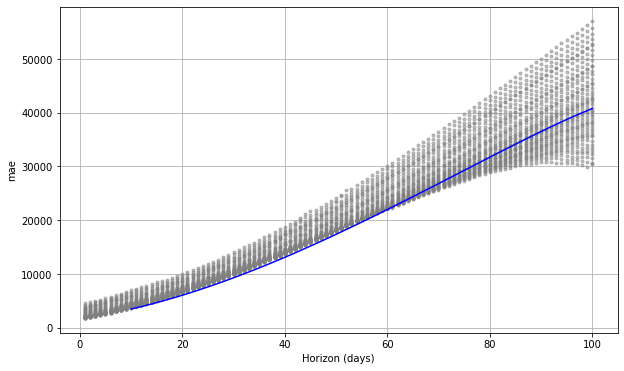

In [150]:
fig = plot_cross_validation_metric(df_cv_d, metric='mae')

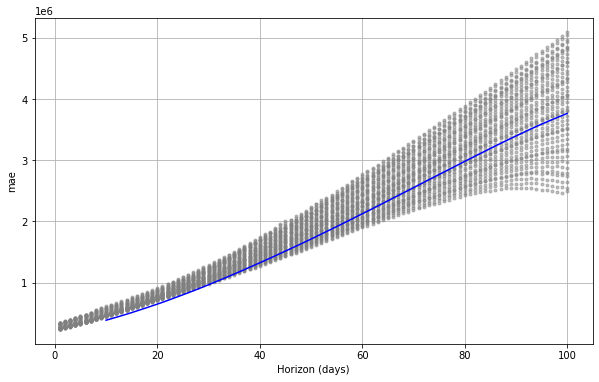

In [151]:
fig = plot_cross_validation_metric(df_cv_r, metric='mae')

## [ 5.0 ] method2: polynomial regression 

In [152]:
dates =  c_df23.keys()

In [153]:
c_df11 = dfconfirmed_cases.rename(columns={ 146 : "TotalConfirmed"})
d_df11 = dfdeaths_reported.rename(columns={ 146 : "TotalDeath"})
r_df11 = dfrecovered_cases.rename(columns={ 131 : "TotalRecovered"})

In [154]:
c_df12 = c_df11.TotalConfirmed
d_df12 = d_df11.TotalDeath
r_df12 = r_df11.TotalRecovered

In [155]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
c_india_cases = np.array(c_df12).reshape(-1, 1)
d_india_cases = np.array(d_df12).reshape(-1, 1)
r_india_cases = np.array(r_df12).reshape(-1, 1)

In [156]:
days_in_future = 100
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-100]

In [157]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [158]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
#confirmed split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, c_india_cases, test_size=0.25, shuffle=False) 
#death split
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22, d_india_cases, test_size=0.25, shuffle=False) 
#recovery split
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22, r_india_cases, test_size=0.25, shuffle=False) 


In [159]:
# transform data for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

poly = PolynomialFeatures(degree=1)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forecast = poly.fit_transform(future_forecast)

poly = PolynomialFeatures(degree=1)
poly_X_train_recovered = poly.fit_transform(X_train_recovered)
poly_X_test_recovered = poly.fit_transform(X_test_recovered)
poly_future_forecast = poly.fit_transform(future_forecast)

In [160]:
# polynomial regression
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
linear_model = LinearRegression(normalize=True, fit_intercept=False)

linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
c_test_linear_pred = linear_model.predict(poly_X_test_confirmed)
c_linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(c_test_linear_pred, y_test_confirmed))
print('MSE:',(mean_squared_error(c_test_linear_pred, y_test_confirmed)))

linear_model.fit(poly_X_train_death, y_train_death)
d_test_linear_pred = linear_model.predict(poly_X_test_death)
d_linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(d_test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(d_test_linear_pred, y_test_death))

linear_model.fit(poly_X_train_recovered, y_train_recovered)
r_test_linear_pred = linear_model.predict(poly_X_test_recovered)
r_linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(r_test_linear_pred, y_test_recovered))
print('MSE:',mean_squared_error(r_test_linear_pred, y_test_recovered))

#            poly reg         svm
#deg.1 903299345643.7173 106359693663073.06 
#deg.2 46122229536951.26 3652888381451.663
#deg.3 27942757671586.94 91471041514954.9
#deg.4 93304406573972.66 318665880692719.94
#deg.5 424239601158142.2
#deg.6 40824607907653.51
#deg.6 3371379737798652.0


MAE: 757702.2230088777
MSE: 802274747296.844
MAE: 10113.234762646653
MSE: 131287029.6234502
MAE: 1420304.7561982262
MSE: 2197092522369.7058


### [ 5.1 ] Confirmed cases prediction

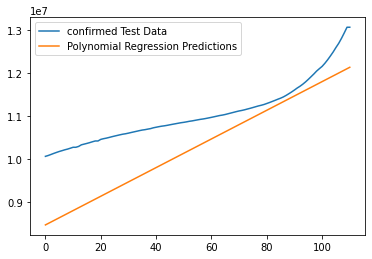

In [161]:
plt.plot(y_test_confirmed)
plt.plot(c_test_linear_pred)
plt.legend(['confirmed Test Data', 'Polynomial Regression Predictions'])


### [ 5.2 ] Death cases prediction

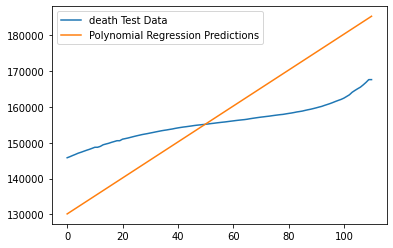

In [162]:
plt.plot(y_test_death)
plt.plot(d_test_linear_pred)
plt.legend(['death Test Data', 'Polynomial Regression Predictions'])


### [ 5.2 ] Recovered cases prediction

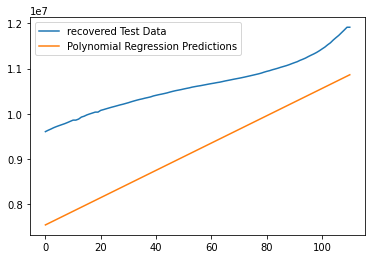

In [163]:
plt.plot(y_test_recovered)
plt.plot(r_test_linear_pred)
plt.legend(['recovered Test Data', 'Polynomial Regression Predictions'])

## [ 6.0 ] method3: SVM Predictions

In [164]:
c_y = y_train_confirmed.ravel()
y_train_confirmed = np.array(c_y).astype(int)
d_y = y_train_death.ravel()
y_train_death = np.array(d_y).astype(int)
r_y = y_train_recovered.ravel()
y_train_recovered = np.array(r_y).astype(int)

In [165]:
from sklearn.svm import SVR
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=2, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
c_svm_pred = svm_confirmed.predict(future_forecast)

svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=2, C=0.1)
svm_death.fit(X_train_death, y_train_death)
d_svm_pred = svm_death.predict(future_forecast)

svm_recovered = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=2, C=0.1)
svm_recovered.fit(X_train_recovered, y_train_recovered)
r_svm_pred = svm_recovered.predict(future_forecast)

### [ 6.1 ] Confirmed cases prediction

MAE: 1425650.1228819706
MSE: 2956410431263.656


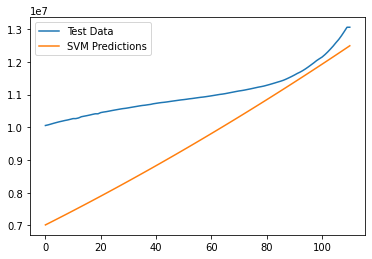

In [166]:
c_svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(c_svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(c_svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(c_svm_test_pred, y_test_confirmed))

#            poly reg         svm
#deg.1 903299345643.7173 106359693663073.06
#deg.2 46122229536951.26 3652888381451.663
#deg.3 27942757671586.94 91471041514954.9
#deg.4 93304406573972.66 318665880692719.94

### [ 6.2 ] Death cases prediction

MAE: 9470545.741982896
MSE: 92226287173450.45


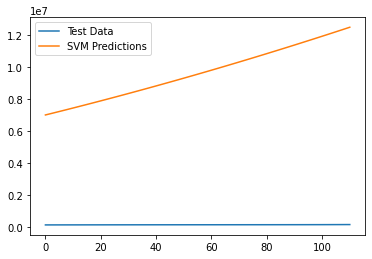

In [167]:
d_svm_test_pred = svm_confirmed.predict(X_test_death)
plt.plot(y_test_death)
plt.plot(d_svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(d_svm_test_pred, y_test_death))
print('MSE:',mean_squared_error(d_svm_test_pred, y_test_death))



### [ 6.3 ] Recovered cases prediction

MAE: 1184988.2550589708
MSE: 2089659477028.022


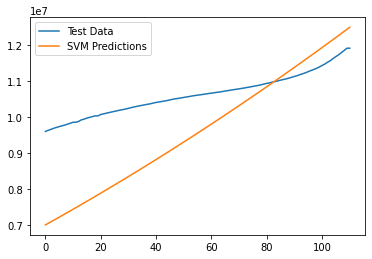

In [168]:
r_svm_test_pred = svm_confirmed.predict(X_test_recovered)
plt.plot(y_test_recovered)
plt.plot(r_svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(r_svm_test_pred, y_test_recovered))
print('MSE:',mean_squared_error(r_svm_test_pred, y_test_recovered))

## [ 7.0 ] Setting up with dates

In [169]:
def plot_predictions(x, y, pred, algo_name, color,z):
    plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=15)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('Number of Cases', size=10)
    plt.legend([z, algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()


### [ 7.1 ] graph represention confirmed, death, recovered cases since 1/22/2020  

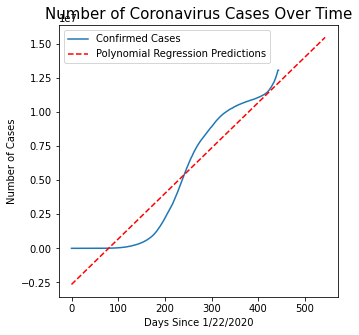

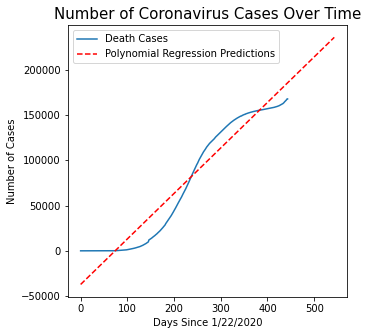

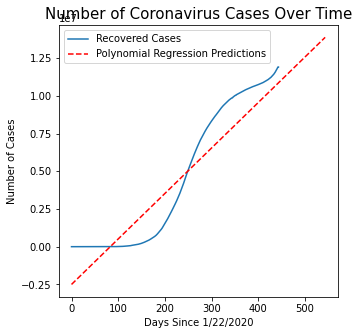

In [170]:
plot_predictions(adjusted_dates, c_india_cases, c_linear_pred, 'Polynomial Regression Predictions', 'red','Confirmed Cases')
plot_predictions(adjusted_dates, d_india_cases, d_linear_pred, 'Polynomial Regression Predictions', 'red','Death Cases')
plot_predictions(adjusted_dates, r_india_cases, r_linear_pred, 'Polynomial Regression Predictions', 'red','Recovered Cases')

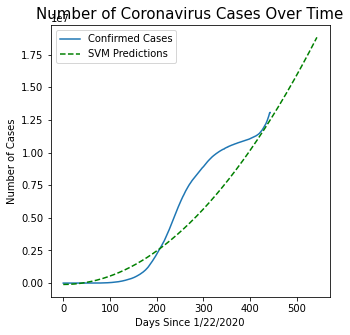

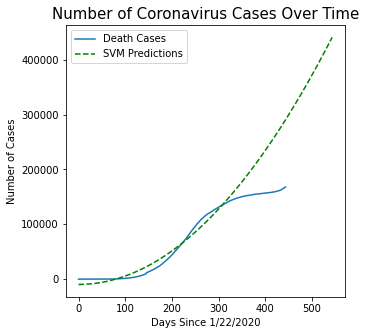

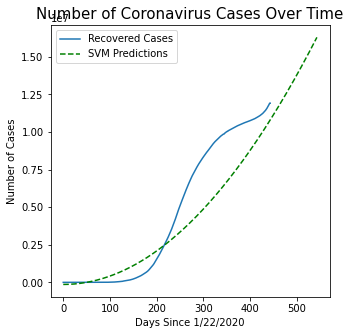

In [171]:
plot_predictions(adjusted_dates, c_india_cases, c_svm_pred, 'SVM Predictions', 'green','Confirmed Cases')
plot_predictions(adjusted_dates, d_india_cases, d_svm_pred, 'SVM Predictions', 'green','Death Cases')
plot_predictions(adjusted_dates, r_india_cases, r_svm_pred, 'SVM Predictions', 'green','Recovered Cases')

### [ 7.2 ] Predicted data represention confirmed, death, recovered cases since 1/22/2020

In [172]:
# Future predictions using polynomial regression
c_linear_pred = c_linear_pred.reshape(1,-1)[0]

d_linear_pred = d_linear_pred.reshape(1,-1)[0]

r_linear_pred = r_linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-100:], 'polynomial Predicted # of Confirmed Cases india': np.round(c_linear_pred[-100:]),'polynomial Predicted # Death Cases india': np.round(d_linear_pred[-100:]),'polynomial Predicted # Recovered Cases india': np.round(r_linear_pred[-100:])})
poly_df.head(20)

,Date,polynomial Predicted # of Confirmed Cases india,polynomial Predicted # Death Cases india,polynomial Predicted # Recovered Cases india
0,04/10/2021,12161998.0,185855.0,10893059.0
1,04/11/2021,12195352.0,186357.0,10923231.0
2,04/12/2021,12228706.0,186859.0,10953404.0
3,04/13/2021,12262061.0,187361.0,10983577.0
4,04/14/2021,12295415.0,187863.0,11013749.0
5,04/15/2021,12328770.0,188365.0,11043922.0
6,04/16/2021,12362124.0,188868.0,11074095.0
7,04/17/2021,12395479.0,189370.0,11104267.0
8,04/18/2021,12428833.0,189872.0,11134440.0
9,04/19/2021,12462187.0,190374.0,11164613.0


In [173]:
v11 = confirmed_tidy[confirmed_tidy.columns[4:6]]
v11['Date'] = pd.to_datetime(v11['Date'])
v11['type'] = 'Confirmed'
v11
c_poly_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'Confirmed': np.round(c_linear_pred[-100:])})
c_poly_df['Date'] = pd.to_datetime(c_poly_df['Date'])
c_poly_df['type'] = 'Confirmed'
df112 = pd.concat([v11,c_poly_df], axis=0)
df112.reset_index(drop=True, inplace=True)
df1122 = df112.rename(columns={"Confirmed": "Poly_count"})

In [174]:
v12 = deaths_tidy[deaths_tidy.columns[4:6]]
v12['Date'] = pd.to_datetime(v12['Date'])
v12['type'] = 'Death'
d_poly_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'Deaths': np.round(d_linear_pred[-100:])})
d_poly_df['Date'] = pd.to_datetime(d_poly_df['Date'])
d_poly_df['type'] = 'Death'
df113 = pd.concat([v12,d_poly_df], axis=0)
df113.reset_index(drop=True, inplace=True)
df1133 = df113.rename(columns={"Deaths": "Poly_count"})

In [175]:
v13 = recovered_tidy[recovered_tidy.columns[4:6]]
v13['Date'] = pd.to_datetime(v13['Date'])
v13['type'] = 'Recovered'
r_poly_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'recovered': np.round(r_linear_pred[-100:])})
r_poly_df['Date'] = pd.to_datetime(r_poly_df['Date'])
r_poly_df['type'] = 'Recovered'
df114 = pd.concat([v13,r_poly_df], axis=0)
df114.reset_index(drop=True, inplace=True)
df1144 = df114.rename(columns={"recovered": "Poly_count"})

In [176]:
f_df113 = pd.concat([df1122,df1133,df1144], axis=0)
f_df113.reset_index(drop=True, inplace=True)

In [177]:
corona_sums3 = f_df113.groupby(['type', 'Date'],as_index=False).agg({'Poly_count':'sum'})
def plot_timeseries(df):
    fig = px.line(df, x='Date', y='Poly_count', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)

fig = plot_timeseries(corona_sums3)
fig.show()

In [178]:
v11 = confirmed_tidy[confirmed_tidy.columns[4:6]]
v11['Date'] = pd.to_datetime(v11['Date'])
v11['type'] = 'Confirmed'
v11
c_svm_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'Confirmed': np.round(c_svm_pred[-100:])})
c_svm_df['Date'] = pd.to_datetime(c_svm_df['Date'])
c_svm_df['type'] = 'Confirmed'
sdf112 = pd.concat([v11,c_svm_df], axis=0)
sdf112.reset_index(drop=True, inplace=True)
sdf1122 = sdf112.rename(columns={"Confirmed": "svm_count"})

v12 = deaths_tidy[deaths_tidy.columns[4:6]]
v12['Date'] = pd.to_datetime(v12['Date'])
v12['type'] = 'Death'
v12
d_svm_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'Deaths': np.round(d_svm_pred[-100:])})
d_svm_df['Date'] = pd.to_datetime(d_svm_df['Date'])
d_svm_df['type'] = 'Death'
sdf113 = pd.concat([v12,d_svm_df], axis=0)
sdf113.reset_index(drop=True, inplace=True)
sdf1133 = sdf113.rename(columns={"Deaths": "svm_count"})

v13 = recovered_tidy[recovered_tidy.columns[4:6]]
v13['Date'] = pd.to_datetime(v12['Date'])
v13['type'] = 'Recovered'

r_svm_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'recovered': np.round(r_svm_pred[-100:])})
r_svm_df['Date'] = pd.to_datetime(r_svm_df['Date'])
r_svm_df['type'] = 'Recovered'
sdf114 = pd.concat([v13,r_svm_df], axis=0)
sdf114.reset_index(drop=True, inplace=True)
sdf1144 = sdf114.rename(columns={"recovered": "svm_count"})

sf_df113 = pd.concat([sdf1122,sdf1133,sdf1144], axis=0)
sf_df113.reset_index(drop=True, inplace=True)

In [179]:
corona_sums4 = sf_df113.groupby(['type', 'Date'],as_index=False).agg({'svm_count':'sum'})
def plot_timeseries(df):
    fig = px.line(df, x='Date', y='svm_count', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)

fig = plot_timeseries(corona_sums4)
fig.show()

## [ 8.0 ] Conclusion



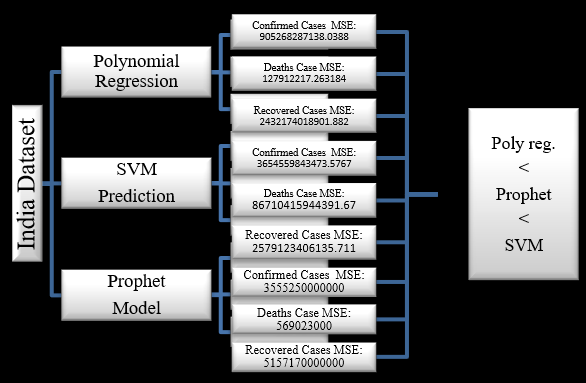

In [180]:

r_b = print((mean_squared_error(c_test_linear_pred, y_test_confirmed)))
s_b = print(mean_squared_error(c_svm_test_pred, y_test_confirmed))

802274747296.844
2956410431263.656


In [181]:
a = pd.DataFrame(df_p_c.mean())
b = a.transpose()
v = b.astype(int)
print('form prophet model:\n',v['mse'],'\n')
print("from poly reg model:\n",(mean_squared_error(c_test_linear_pred, y_test_confirmed)))
print("\nfrom svm model:\n",(mean_squared_error(c_svm_test_pred, y_test_confirmed)))

form prophet model:
 0    3481491576312
Name: mse, dtype: int64 

from poly reg model:
 802274747296.844

from svm model:
 2956410431263.656


bold text

1.   3591561446479.00   p
2.   961973830352.7228  r
3.   3937222318767.7705 s
